In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid', rc={'ytick.left' : True})
pal = sns.color_palette(palette='icefire')
primary = pal[1]
secondary = pal[5]
highlight = pal[0]

In [3]:
def twin_plot(df, ax):
    sns.barplot(df, x='power', y='energy', label='Energy', legend=False, color=primary, ax=ax)
    ax.errorbar(x=range(len(df)), y=df['energy'], yerr=df['energysd'], fmt='none', c='black', linewidth=2)
    axt = ax.twinx()
    sns.lineplot(x=range(len(df)), y=df['runtime'], label='Runtime', legend=False, color=secondary, linewidth=2.5, ax=axt)

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(highlight)
            break

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper center')

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    axt.set_ylim((0,None))
    axt.grid(False)

In [16]:
def pareto_plot(df, ax):
    sns.scatterplot(df, x='energy', y='runtime', ax=ax)
    ax.set_xlim((0,None))
    ax.set_ylim((0,None))

    sorted_list = sorted([[x, y] for x, y in zip(df['energy'], df['runtime'])])
    
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if pair[1] <= pareto_front[-1][1]:
            pareto_front.append(pair)

    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    sns.lineplot(x=pf_X, y=pf_Y, ax=ax)

In [17]:
def plot(path):
    df = pd.read_csv(path, names=['name', 'size', 'threads', 'power', 'runtime', 'runtimesd', 'energy', 'energysd'])
    df['power'] /= 1e6

    for (name, threads, size), group in df.groupby(['name', 'threads', 'size']):
        if name == 'transp': continue

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))
        twin_plot(group, ax1)
        pareto_plot(group, ax2)
        fig.suptitle(f'{name} {size} using {threads} threads')
        plt.tight_layout()
        plt.show()

## N-body

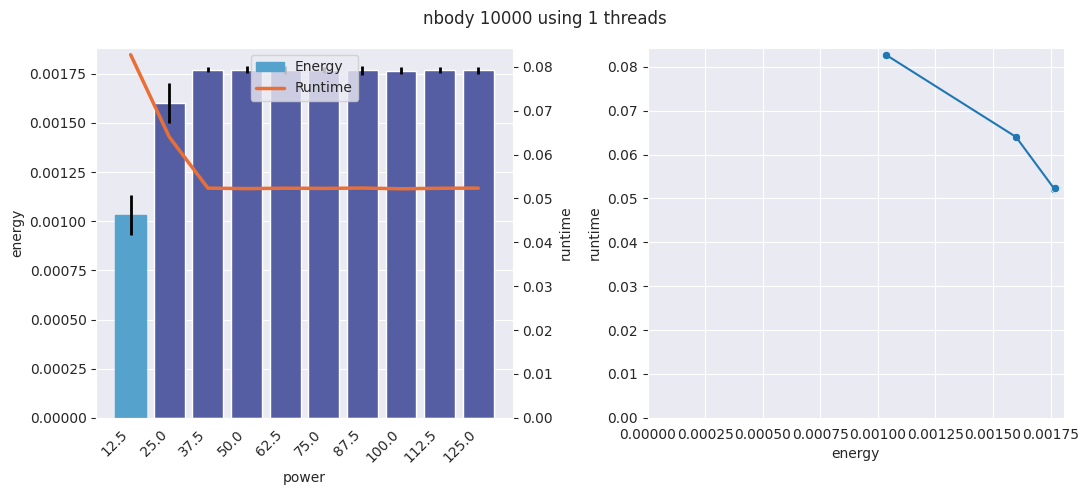

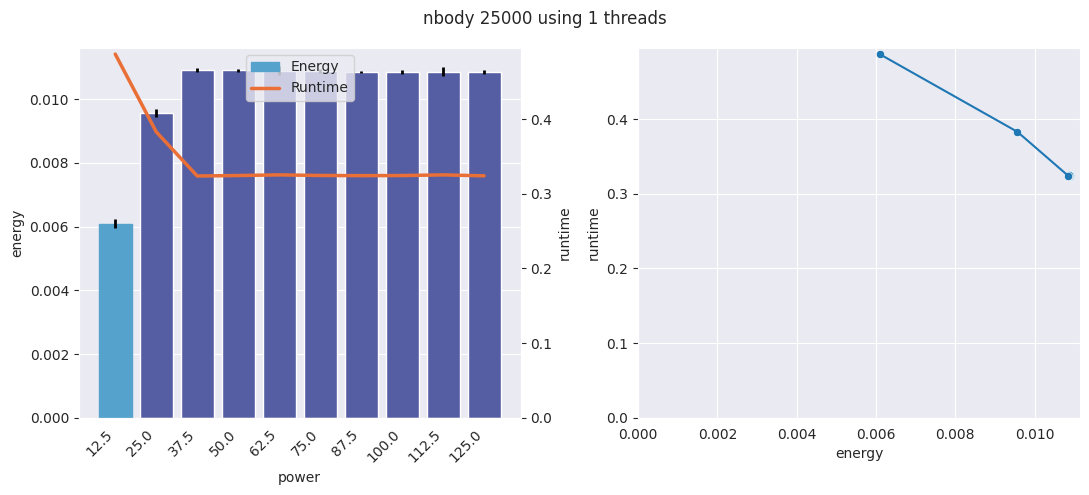

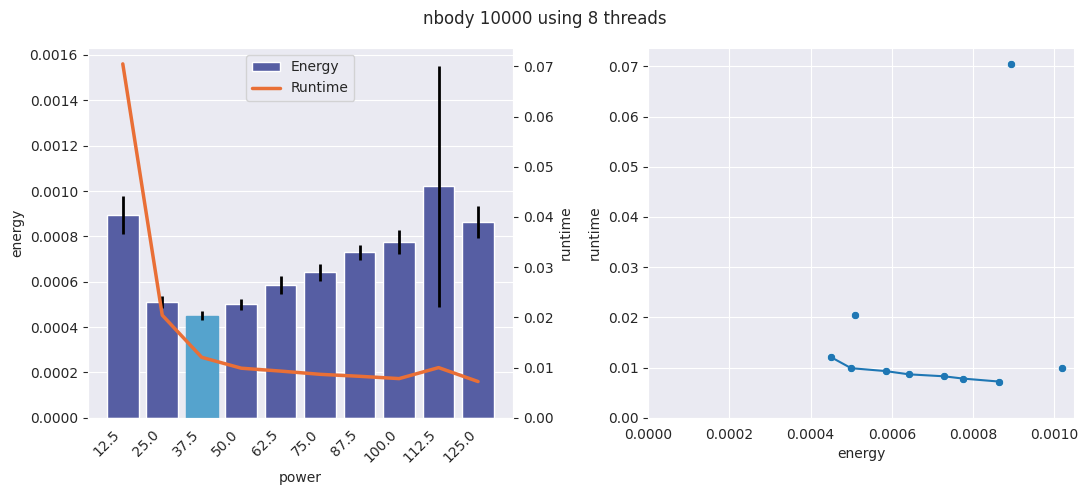

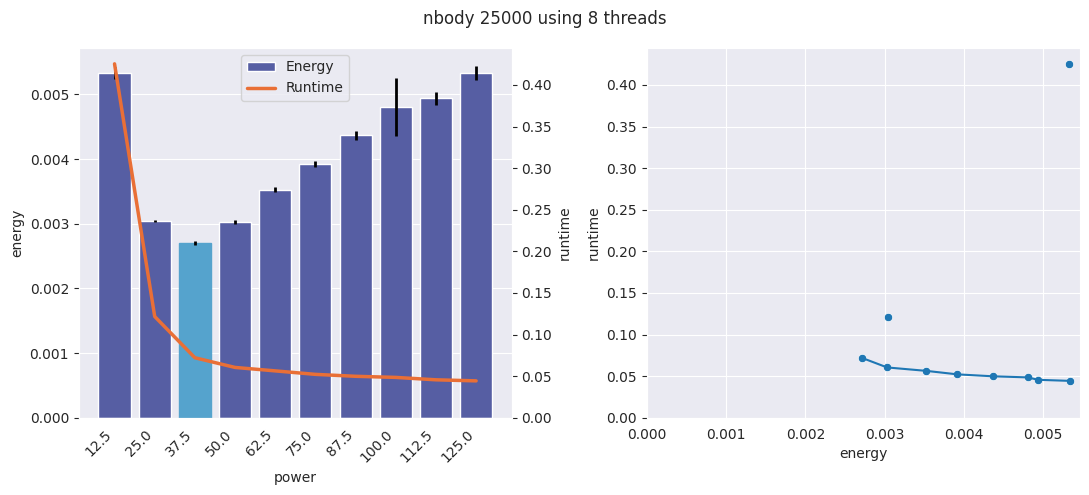

In [22]:
plot('results_sel265k/nbody.csv')

## Stencil

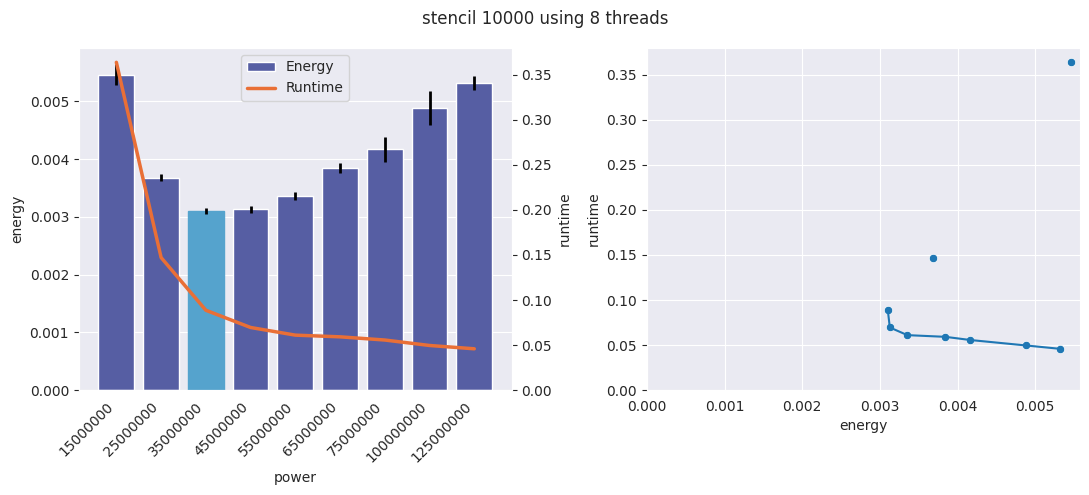

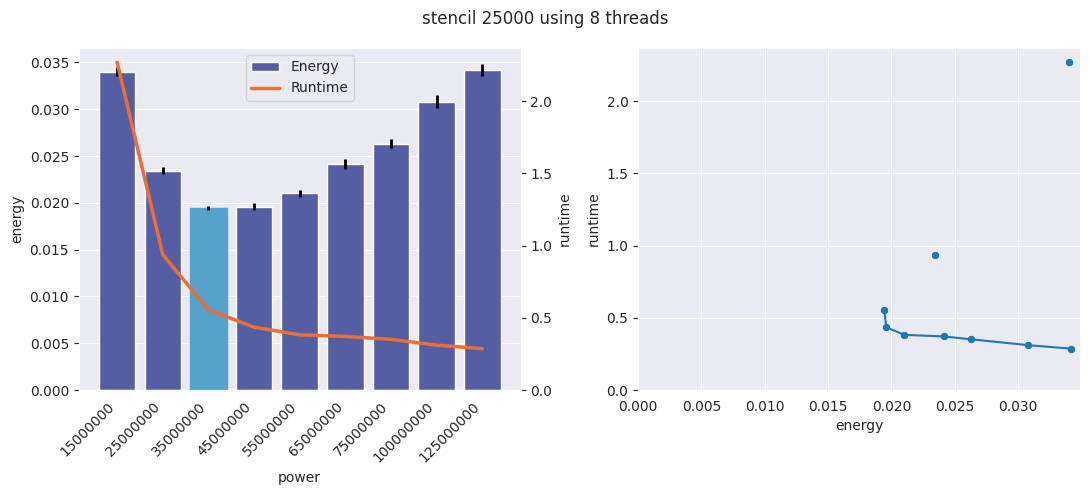

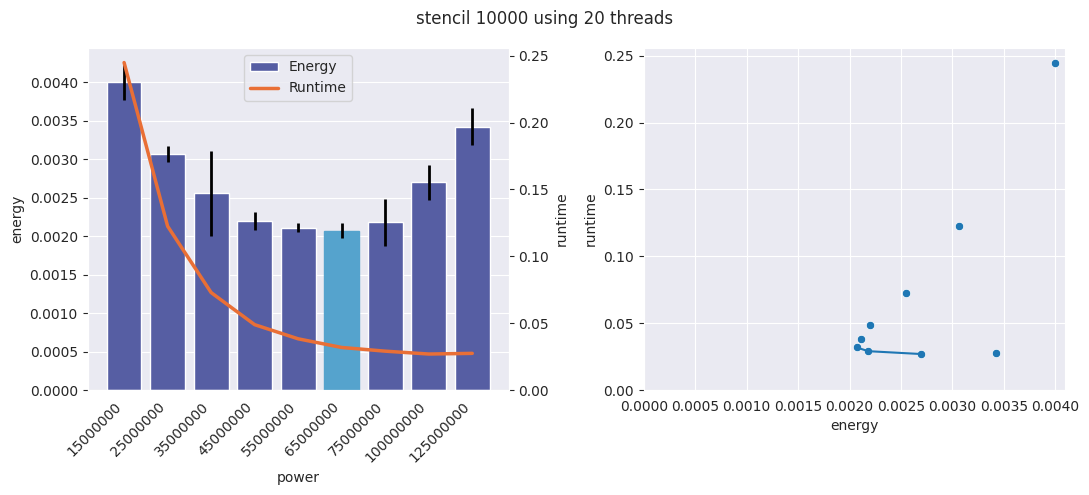

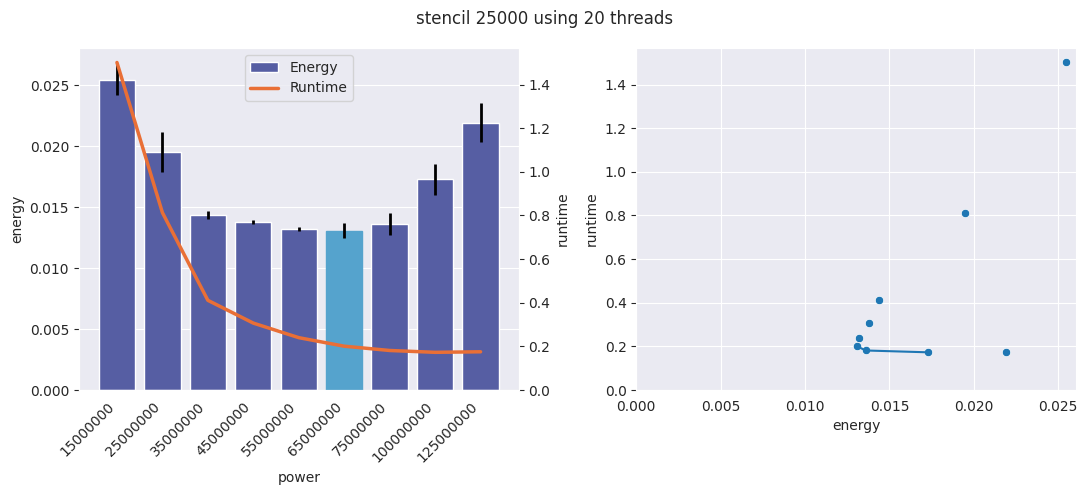

In [152]:
plot('results_sel265k/stencil.csv')

## Matmul

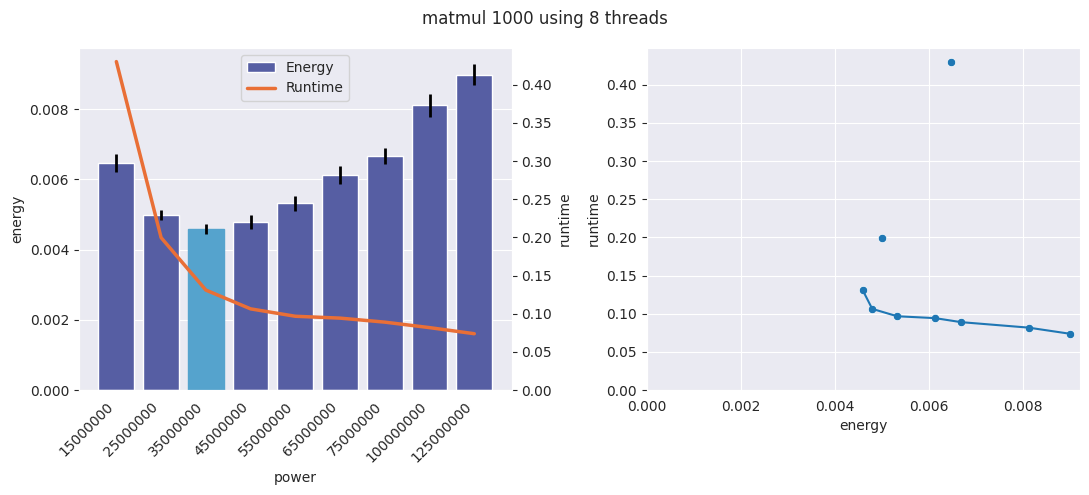

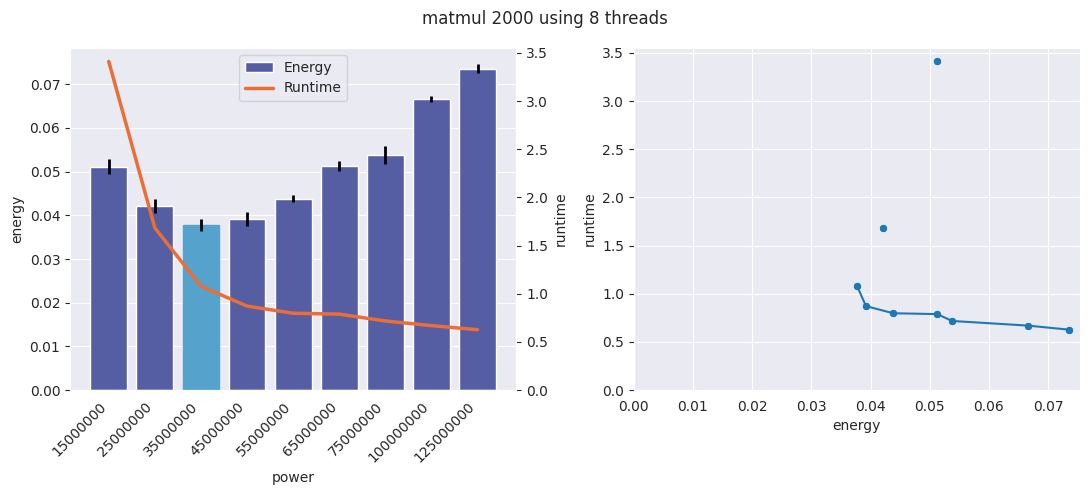

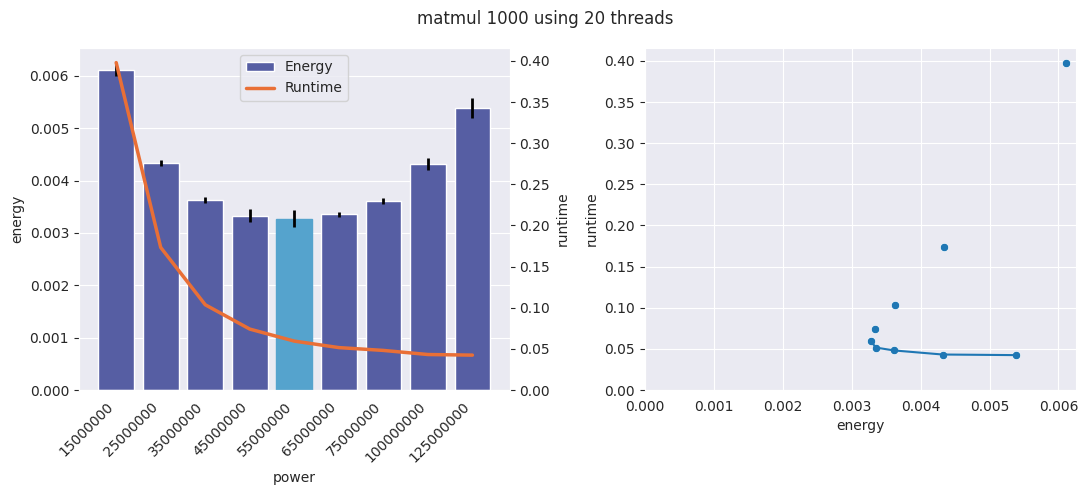

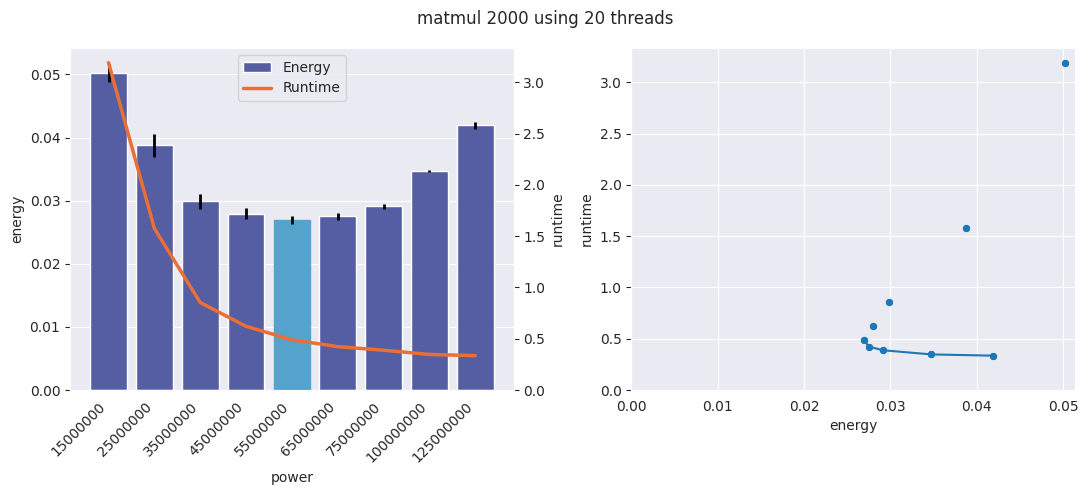

In [153]:
plot('results_sel265k/matmul.csv')

## Matmul naive

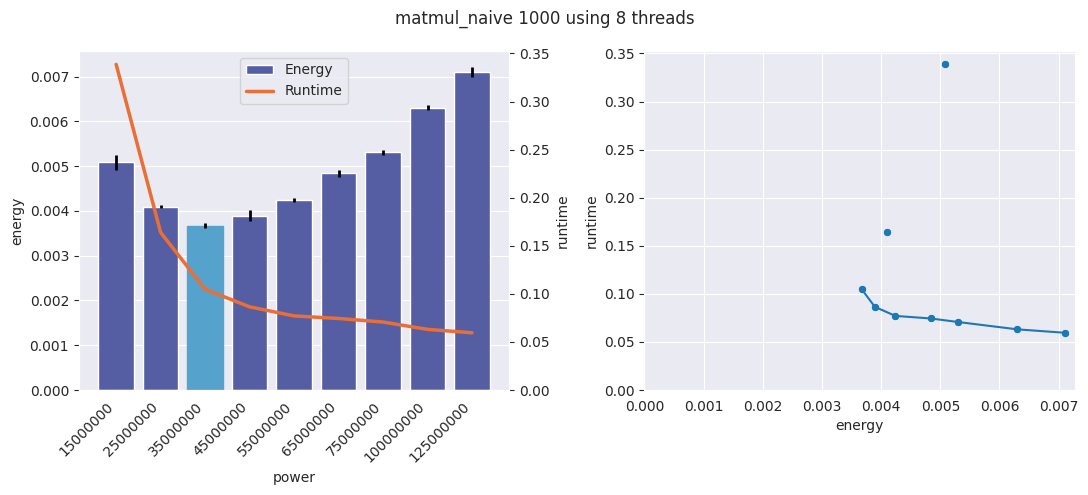

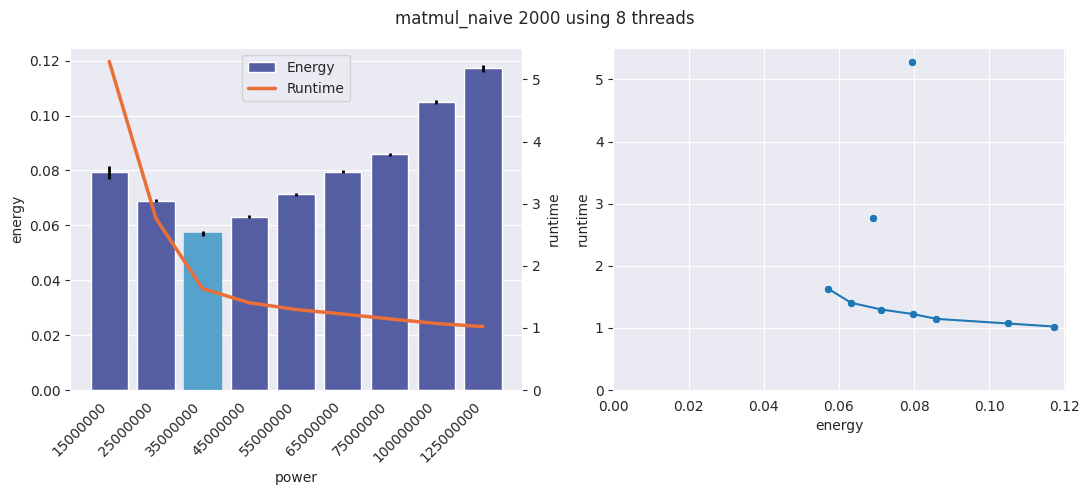

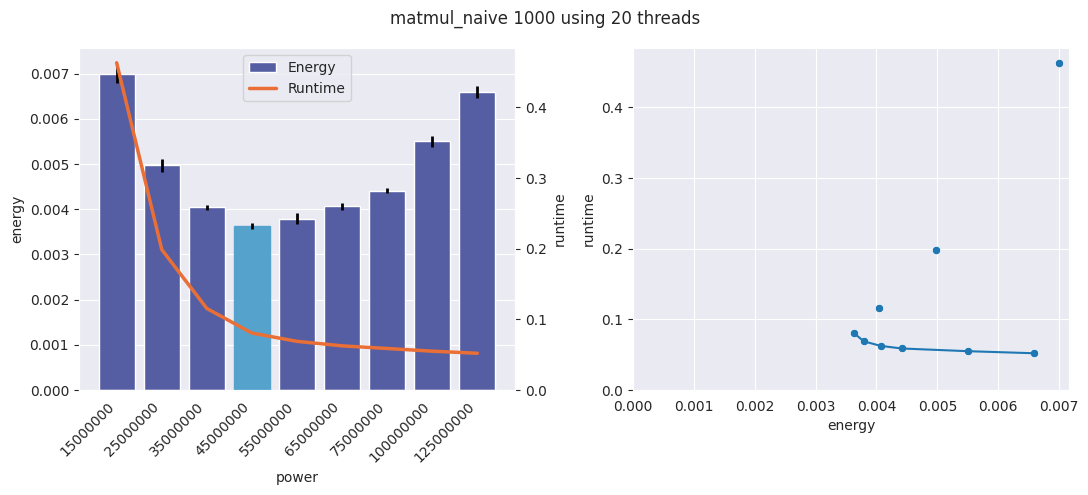

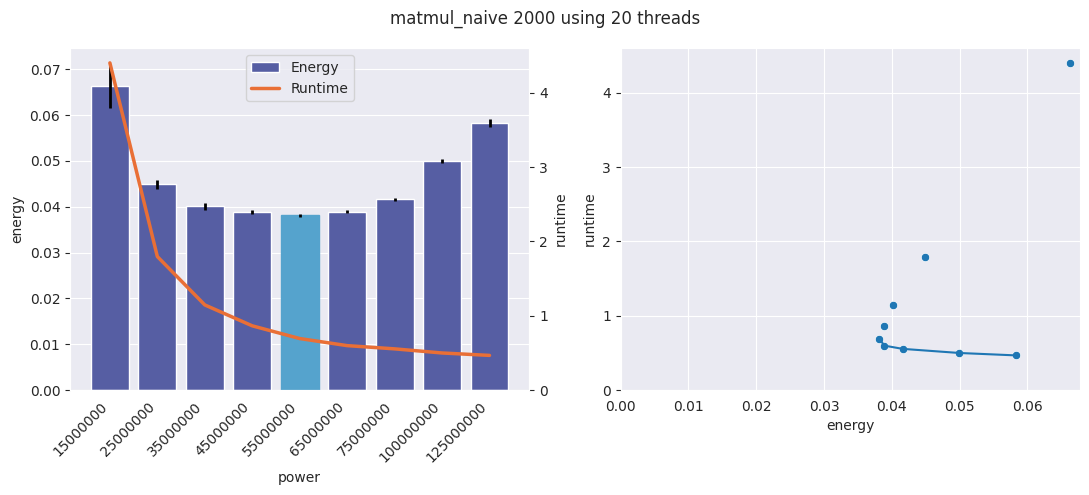

In [154]:
plot('results_sel265k/matmul_naive.csv')

## FlashAttention

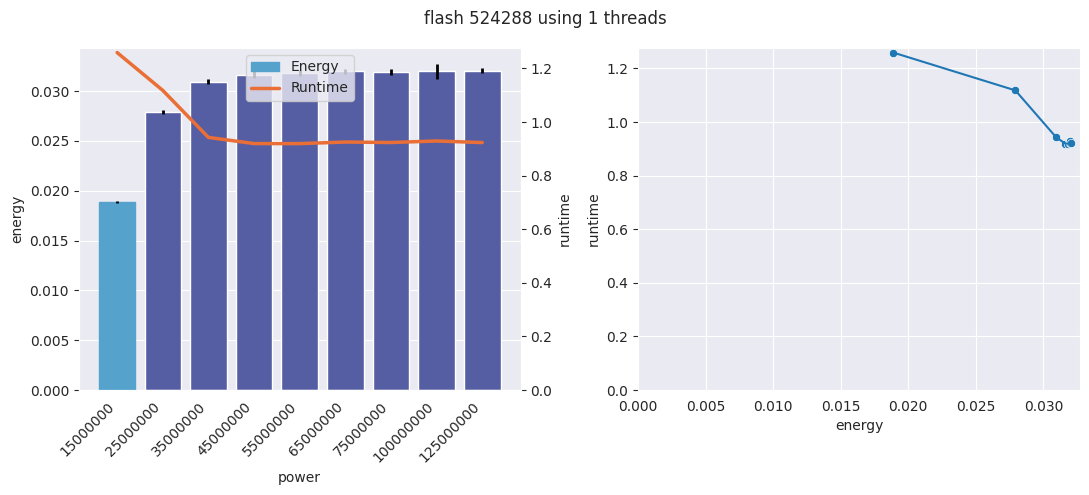

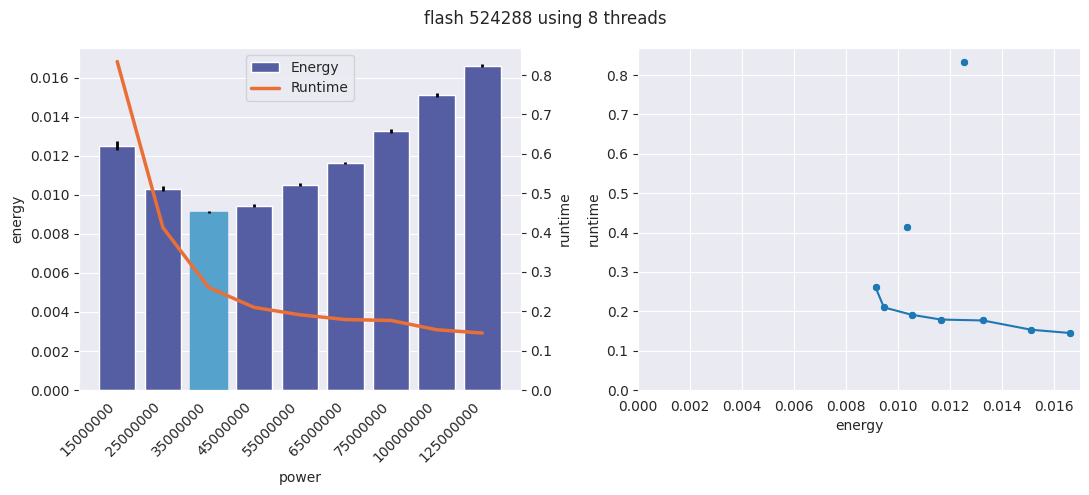

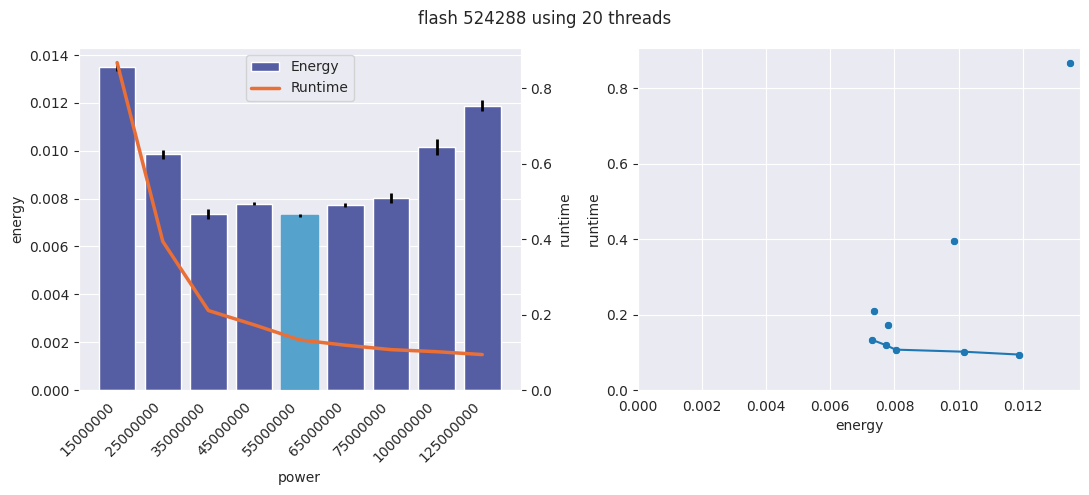

In [155]:
plot('results_sel265k/flash.csv')